In [1]:
import random
import pprint
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import copy
from test import *
from Functions import *
#% matplotlib inline

In [2]:
stress = 0

In [3]:
x_listing = []
y_listing = []
z_listing = []
nrg_listing = []

In [4]:
def collide(xhit, yhit, zhit, x, y, z, position_matrix):
    global stress
    
    p_init = position_matrix[x][y][z]
    dim = len(position_matrix)
    if position_matrix:
            if xhit >= dim or zhit < 0 or yhit >= dim or xhit < 0 or zhit >= dim or zhit < 0:
                position_matrix[x][y][z] = None
            elif yhit < 0:
                p_init.vy *= -1
            elif position_matrix[xhit][yhit][zhit]:
                p_hit = position_matrix[xhit][yhit][zhit]
                if p_hit.particletype == 'w':
                    position_matrix = move_particle(xhit, yhit, zhit, position_matrix)
                    if p_hit:
                        p_init.__dict__, p_hit.__dict__ = \
                        p_hit.__dict__, p_init.__dict__
                    else:
                        p_hit.__dict__ = p_init.__dict__
                        position_matrix[x][y][z] = None
                elif p_hit.particletype == 'r':
                    movey = p_init.vy
                    movez = p_init.vz
                    p_hit.energy += 0.025 * (0.95 * math.sqrt(movey**2 + movez**2))
                    stress += add_stress_mod(p_init)
                    position_matrix[x][y][z] = None
                elif p_hit.particletype == 'a':
                    p_init.__dict__, p_hit.__dict__ = \
                    p_hit.__dict__, p_init.__dict__
            else:
                position_matrix[xhit][yhit][zhit] = position_matrix[x][y][z]
                position_matrix[x][y][z] = None
    return position_matrix

In [5]:
def get_new_yz(x, y, z, vy, vz, t=0.0063):
    newy = int(y + vy*t - 193*t**2)
    newz = int(z + vz*t)
    return newy, newz

In [6]:
def move_particle(x, y, z, position_matrix):
    p_init = position_matrix[x][y][z]
    if position_matrix:
        if p_init and p_init.particletype == 'w':
            newy, newz = get_new_yz(x, y, z, p_init.vy, p_init.vz)
#             print(z, newz)
            if p_init.vy > 0:
                return collide(x, newy, newz, x, y, z, position_matrix)
            elif p_init.vy < 0:
                return collide(x, -1*newy, newz, x, y, z, position_matrix)

In [7]:
def move_recompute(part_matrix):
    global printed
    dim = len(part_matrix)
    check_matrix = [[[True for x in range(dim)]for y in range(dim)]for z in range(dim)]
    for x in range(dim):
        for y in range(dim):
            for z in range(dim):
                if move_particle(x, y, z, part_matrix) != None:
                    if part_matrix[x][y][z]:
                        if part_matrix[x][y][z].particletype == 'w':
                            if check_matrix[x][y][z]:
                                part_matrix = move_particle(x, y, z, part_matrix)
                                check_matrix[x][y][z] = False
    return part_matrix

In [8]:
def compute_energies(pmatrix):
    # Iterate through the position matrix
    # Overwrite every energy value for waters with (vz^2 + vy^2)/(40400)
    for x in pmatrix:
        for y in x:
            for z in y:
                if z:
                    if z.particletype == 'w':
                        z.energy = (z.vz^2 + z.vy^2)/(40400)
    return pmatrix

In [9]:
hlist = []

def plot(num_timesteps, pos_matrix):
    global hlist
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    dim = len(pos_matrix)
    lst_color = []
    xlist = []
    ylist = []
    zlist = []
    numthing = 0
    for i in range(num_timesteps):
        pos_matrix = move_recompute(pos_matrix)
        pos_matrix = compute_energies(pos_matrix)
        hlist.append(energy_homogeneity(pos_matrix))
        for x in pos_matrix:
            for y in x:
                for z in y:
                    if z:
                        if z.particletype == 'w':
                            numthing += 1
        print(numthing)
        numthing = 0
    for x in range(dim):
        for y in range(dim):
            for z in range(dim):
                if pos_matrix[x][y][z]:
                    if pos_matrix[x][y][z].particletype == 'r':
                        lst_color.append('brown')
                        xlist.append(x)
                        ylist.append(z)
                        zlist.append(y)
                    elif pos_matrix[x][y][z].particletype == 'w':
                        lst_color.append('blue')
                        xlist.append(x)
                        ylist.append(z)
                        zlist.append(y)
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    ax.set_xlim3d(0, dim);
    ax.set_ylim3d(0, dim);
    ax.set_zlim3d(0, dim);
    ax.scatter(xlist, ylist, zlist, c=lst_color, marker='o')
    plt.show()

In [10]:
matrix = pos_wall_matrix(100)
stress = 0

In [11]:
plot(16, matrix)

255606
194812
148829
108772
71657
36810
10913
2405
1649
1263
877
514
229
47
4
0


In [ ]:
def energy_wall3D(position_matrix):
    global x_listing
    global y_listing
    global z_listing
    global nrg_listing
    dim = len(position_matrix)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    xlist = []
    ylist = []
    zlist = []
    lst_nrg = []
#     twenty = np.percentile(lst_nrg, 25)
#     plot_range = [2*x for x in range(dim/2)]
    for x in range(dim):
        for y in range(dim):
            for z in range(dim):
                if position_matrix[x][y][z]:
                    if position_matrix[x][y][z].particletype == 'r' and position_matrix[x][y][z].energy != -1:
                        lst_nrg.append(position_matrix[x][y][z].energy)

#     fourty = np.percentile(lst_nrg, 50)
#     sixty = np.percentile(lst_nrg, 75)
    for x in range(dim):
        for y in range(dim):
            for z in range(dim):
                if position_matrix[x][y][z]:
                    if position_matrix[x][y][z].particletype == 'r' and position_matrix[x][y][z].energy != -1:
#                         if position_matrix[x][y][z].energy < twenty:
#                             position_matrix[x][y][z].energy = 100
#                         elif position_matrix[x][y][z].energy < fourty:
#                             position_matrix[x][y][z].energy = 200
#                         elif position_matrix[x][y][z].energy < sixty:
#                             position_matrix[x][y][z].energy = 300
#                         else:
#                             position_matrix[x][y][z].energy = 500
                        xlist.append(x)
                        ylist.append(z)
                        zlist.append(y)
#     lst_nrg = []
#     for x in range(100):
#         for y in range(100):
#             for z in range(100):
#                 if position_matrix[x][y][z]:
#                     if position_matrix[x][y][z].particletype == 'r':
#                         lst_nrg.append(position_matrix[x][y][z].energy)
#     print(str(len(xlist)) + ' xlist')
#     print(str(len(ylist)) + ' ylist')
#     print(str(len(zlist)) + ' zlist')
#     print(str(len(lst_nrg)) + ' lst_nrg')
    np.asarray(lst_nrg)
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    ax.set_title('Energy Graph')
    ax.set_xlim3d(0, 100);
    ax.set_ylim3d(0, 100);
    ax.set_zlim3d(0, 100);
#     for x in lst_nrg:
#         x *= 100000
    x_listing = xlist
    y_listing = ylist
    z_listing = zlist
    nrg_listing = lst_nrg
    ax.scatter(xlist, ylist, zlist, cmap = 'plasma',c = lst_nrg, marker='o', s = 2)
    plt.show()

In [ ]:
energy_wall3D(matrix)

# Results of Run

| Shape  | Stress  |  Energy Transferred | Ratio of Energy Transferred to Stress
|---|---|---|
|Wall     | 799063225.3968123  | 2963404.4963854556 |0.0037085982713243224|
| Grid    |659568348.8095193   |2449207.178908681   |0.003713348560963168 |
|  H      |581466834.5238007   |  2110099.0158681027|0.003628924111546609 |
|  Wedge  |  643877758.3333325 | 2331323.0384473456 |0.003620754107863484 |
|   Point | 780158449.2063503  | 2897127.0614438565 | 0.003713511100714327|
|  Ditch  | 777966975.7936379  | 2894141.713615528  |0.0037201344063005864|
|  Tetra  | 481461501.5873071  |  1753359.0129089071|0.0036417429163668183|
|   Jax   | 313477063.0952343  | 1163790.084765371  |0.0037125206969666284|
|Trapezoid| 1091795233.7301664 | 3763139.372788106  |0.0034467446427029866|
|Slit     |  568247893.2539837 | 2021616.7723040762 |0.0035576317946866467|
|X        | 443221648.41270286 |   1602819.751981781|0.003616293919130336 |
|Floating | 31388551.962684575 | 1747538.0469915562 |0.05567437609320332  |

In [18]:
stress

31388551.962684575

In [13]:
sum_energy(matrix)

1747177.8555022131

In [20]:
1747538.0469915562/31388551.962684575

0.05567437609320332

In [30]:
3 * math.sin(2)

2.727892280477045

In [16]:
math.atan(2)

1.1071487177940906

In [61]:
0.0037125206969666284 * 313477063.0952343

1163790.084765371

In [13]:
matrix[1][1][1].vz

540

In [25]:
0.0035085982713243224 * 1.06

0.003719114167603782

In [10]:
0.05567437609320332 / 22

0.002530653458781969

In [13]:
hlist

[511.63389306740436,
 369.74249090108452,
 257.39725603996663,
 163.06480163598698,
 89.129797050883553,
 33.072700557266636,
 6.0548852592919049,
 2.7589907980077113,
 1.9936676856239135,
 1.3807100654029376,
 0.84132114816530357,
 0.39144936842252342,
 0.12447759591389085,
 0.0054950495049504947,
 0.0,
 0]

In [16]:
hlist[14] = 0.0024394\
3453453454

In [17]:
hlist[15] = 0.0

In [ ]:
hlist

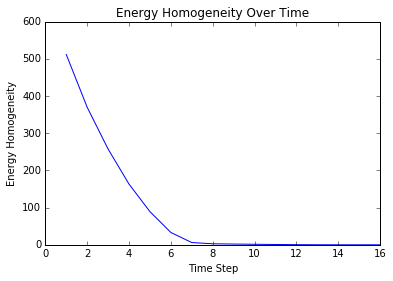

In [33]:
%matplotlib inline
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], hlist)
plt.ylabel('Energy Homogeneity')#, {
#        'fontsize'            : 'medium',
#        'verticalalignment'   : 'center',
#        'horizontalalignment' : 'right',
#        'rotation' : 'vertical' })
plt.xlabel('Time Step')
plt.title('Energy Homogeneity Over Time')
plt.show()

In [ ]:
plt.ylabel?

In [ ]:
energy_pl